In [1]:
import math
import numpy as np
import bz2
import json
import matplotlib.pyplot as plt
# %matplotlib qt
%matplotlib inline

In [2]:
Fnyquist = 1.0
nsamples = 8500
tick = 1.0/(2*Fnyquist)
ticks = np.arange(0, nsamples*tick, tick)
freqs = np.arange(0, 2*Fnyquist, 2*Fnyquist/nsamples)

In [3]:
def waves_from_file(mag_file, scale=2000./4095.) :
    waves = np.loadtxt(mag_file)
    waves = waves - np.mean(waves)
    return waves*scale

def mean_spec(waves):
    '''
    Return mean spectra of a set of waveforms.
    '''
    print(waves.shape)
    mean = np.zeros_like(waves[0])
    for wave in waves:
        spec = np.abs(np.fft.fft(wave, norm=None))
        mean += spec
    mean /= len(waves)
    return mean

def inspect_spectra_file(spectra_file, planes=None):
    wire_specs = json.loads(bz2.BZ2File(spectra_file, 'r').read())
    for i, wire_spec in enumerate(wire_specs) :
        if planes is not None and wire_spec['plane'] not in planes:
            continue
        print("const {:.3e} plane {}, wirelen {:.1f}".format(wire_spec['const'],wire_spec['plane'],wire_spec['wirelen']))

def specs_from_file(spectra_file, planes=None, wirelen=1500, scale_factor=1.0e9):
    wire_specs = json.loads(bz2.BZ2File(spectra_file, 'r').read())
    for i, wire_spec in enumerate(wire_specs) :
        if planes is not None and wire_spec['plane'] not in planes:
            continue
        if abs(wire_spec['wirelen']-wirelen) > 10 :
            continue
        print("const {:.3e} plane {}, wirelen {:.1f}".format(wire_spec['const'],wire_spec['plane'],wire_spec['wirelen']))
#         plt.plot(wire_spec['freqs'],wire_spec['amps'],label=wire_spec['wirelen'])
        freqs = [x*1000 for x in wire_spec['freqs']]
        amps = [math.sqrt(x**2+(wire_spec['const'])**2)*scale_factor for x in wire_spec['amps']]
        return (freqs,amps)

In [19]:
input_spectra_file = "/home/yuhw/wc/wire-cell-data/dunevd10kt-1x6x6-3view30deg-noise-spectra-v1.json.bz2"
# input_spectra_file = "/home/yuhw/wc/wire-cell-data/dunevd10kt-1x6x6-3view-noise-spectra-v1.json.bz2"
inspect_spectra_file(input_spectra_file, [2])

const 2.374e-08 plane 2, wirelen 44.7
const 2.374e-08 plane 2, wirelen 133.1
const 2.374e-08 plane 2, wirelen 221.5
const 2.374e-08 plane 2, wirelen 309.9
const 2.374e-08 plane 2, wirelen 398.3
const 2.374e-08 plane 2, wirelen 486.7
const 2.374e-08 plane 2, wirelen 575.1
const 2.374e-08 plane 2, wirelen 663.5
const 2.374e-08 plane 2, wirelen 751.9
const 2.374e-08 plane 2, wirelen 840.3
const 2.374e-08 plane 2, wirelen 928.7
const 2.374e-08 plane 2, wirelen 1017.1
const 2.374e-08 plane 2, wirelen 1061.5
const 2.374e-08 plane 2, wirelen 530.9
const 3.411e-08 plane 2, wirelen 2088.6
const 4.082e-08 plane 2, wirelen 1670.9
const 2.374e-08 plane 2, wirelen 3291.1


In [4]:
waves_17 = waves_from_file("noise-0.17.1.txt")
waves_18 = waves_from_file("noise-0.18.0.txt")
spec_17 = mean_spec(waves_17)
spec_18 = mean_spec(waves_18)

(304, 8500)
(304, 8500)


(304, 8500)
(304, 8500)


Text(0.5, 0.98, 'Spectra')

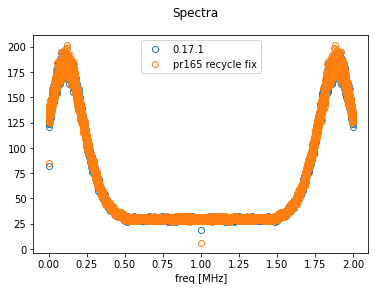

In [5]:
waves_pr = waves_from_file("noise-pr-165-2.txt")
waves_re_fix = waves_from_file("recycle-a307362.txt")
waves_fr = waves_from_file("fresh.txt")

# fig, axes = plt.subplots(1,2)
# axes[0].hist(waves_old.flatten(),bins=100)
# axes[0].title.set_text("RMS={:.2f}".format(np.std(waves_old)))
# axes[0].set_xlabel("0.17.1")
# axes[1].hist(waves_new.flatten(),bins=100)
# axes[1].title.set_text("RMS={:.2f}".format(np.std(waves_new)))
# axes[1].set_xlabel("0.18.0")
# fig.suptitle("noise ADC distribution")


# fig, axes = plt.subplots(1,1)
# im = plt.plot(waves_17[0], "o", label="0.17.1")
# im = plt.plot(waves_from_file("noise-pr-165-1.txt")[0], "-", label="pr165")
# plt.legend(loc='upper center')
# fig.suptitle("wave")

# spec_pr165_1 = mean_spec(waves_from_file("noise-pr-165-1.txt"))
# spec_pr165_2 = mean_spec(waves_from_file("noise-pr-165-2.txt"))
# print(spec_17[4250])
# print(spec_18[4250])
# print(spec_pr165_1[4250])
# print(spec_pr165_2[4250])


fig, axes = plt.subplots(1,1)
# input_spectra1 = specs_from_file(input_spectra_file, [2], wirelen=530.9)
# input_spectra2 = specs_from_file(input_spectra_file, [2], wirelen=2088.6)
# im = plt.plot(input_spectra1[0], input_spectra1[1], "o", label="530.9")
# im = plt.plot(input_spectra2[0], input_spectra2[1], "o", label="2088.6")
# im = plt.plot(freqs, mean_spec(np.abs(waves_from_file("noise-0.17.1.txt"))), "o", mfc='none', label="0.17.1")
# im = plt.plot(freqs, spec_18, "o", mfc='none', label="0.18.0")
# im = plt.plot(freqs, mean_spec(waves_from_file("noise-pr-165-1.txt")), "-", label="pr165-1")
# im = plt.plot(freqs, mean_spec(np.abs(waves_pr)), "o", mfc='none', label="pr165 recycle")
# im = plt.plot(freqs, mean_spec(np.abs(waves_fr)), "o", mfc='none', label="pr165 fresh")
# im = plt.plot(freqs, mean_spec(np.abs(waves_re_fix)), "o", mfc='none', label="pr165 recycle fix")


im = plt.plot(freqs, mean_spec(waves_17), "o", mfc='none', label="0.17.1")
im = plt.plot(freqs, mean_spec(waves_re_fix), "o", mfc='none', label="pr165 recycle fix")
axes.set_xlabel("freq [MHz]")
plt.legend(loc='upper center')
fig.suptitle("Spectra")

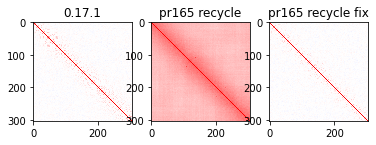

In [6]:
# fig, axes = plt.subplots(1,1)
# axes.imshow(waves_17, aspect="auto", cmap=plt.get_cmap("bwr_r"))
# fig, axes = plt.subplots(1,1)
# axes.imshow((waves_from_file("noise-pr-165-2.txt")), aspect="auto", cmap=plt.get_cmap("bwr_r"))

fig, axes = plt.subplots(1,3)
axes[0].title.set_text("0.17.1")
axes[0].imshow(np.corrcoef(np.abs(waves_17)), cmap=plt.get_cmap("bwr"), interpolation = 'none', clim=(-1,1))
axes[1].title.set_text("pr165 recycle")
axes[1].imshow(np.corrcoef(np.abs(waves_pr)), cmap=plt.get_cmap("bwr"), interpolation = 'none', clim=(-1,1))
axes[2].title.set_text("pr165 recycle fix")
axes[2].imshow(np.corrcoef(np.abs(waves_from_file("recycle-a307362.txt"))), cmap=plt.get_cmap("bwr"), interpolation = 'none', clim=(-1,1))

# fig, axes = plt.subplots(1,3)
# axes[0].hist(np.corrcoef(waves_17[:,:]).flatten(), bins=100, range=(-0.9,0.9))
# axes[1].hist(np.corrcoef(waves_18[:,:]).flatten(), bins=100, range=(-0.9,0.9))
# axes[2].hist(np.corrcoef(waves_from_file("noise-pr-165-2.txt")).flatten(), bins=100, range=(-0.9,0.9))

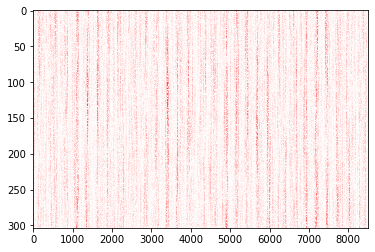

In [7]:
plt.imshow(np.abs(waves_from_file("noise-pr-165-2.txt")), aspect="auto", cmap=plt.get_cmap("bwr"), interpolation = 'none', clim=(-10,10))
# plt.imshow(np.corrcoef(waves), aspect="auto", cmap=plt.get_cmap("bwr"))